In [1]:
import data_preparation as dp
from layers import Conv, ReLU, MaxPool, Flatten, Dense, MSELoss
import custom_model
import numpy as np
import os
import keras_model as km

In [2]:
sources = [
    ("./data/original/plates.csv", "./data/original/photos/"),
    ("./data/original/flipped_plates.csv", "./data/original/flipped_photos/"),
    ("./data/original/noise_plates.csv", "./data/original/noise_photos/"),
    ("./data/original/flipped_noise_plates.csv", "./data/original/flipped_noise_photos/")
]

In [3]:
img_width = 320
img_height = 200
learning_rate = 0.001

In [4]:
X_train, Y_train, X_test, Y_test, X_val, Y_val, true_size_train, true_size_test, true_size_val, filename_train, filename_test, filename_val = dp.load_data(sources, img_width, img_height)

Data loaded.


In [5]:
X = X_train
Y = Y_train
true_size_train = true_size_train

In [6]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)
print(filename_train[:2])
print(filename_val[:2])

(546, 200, 320, 1)
(117, 200, 320, 1)
(117, 200, 320, 1)
['noise_96.jpg' '19.jpg']
['noise_flip_92.jpg' 'flip_167.jpg']


In [7]:
keras_model = km.build_keras_cnn(img_height, img_width, learning_rate)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 198, 318, 8)         │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 99, 159, 8)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 97, 157, 16)         │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 48, 78, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 59904)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 16)                  │         958,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │              36 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 959,900 (3.66 MB)

 Trainable params: 959,900 (3.66 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
history = keras_model.fit(X, Y, validation_data=(X_val, Y_val), batch_size=64, epochs=35)

Epoch 1/35
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 175ms/step - loss: 0.1051 - mean_iou: 0.0013 - val_loss: 0.0408 - val_mean_iou: 0.0169
Epoch 2/35
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 151ms/step - loss: 0.0293 - mean_iou: 0.0111 - val_loss: 0.0184 - val_mean_iou: 0.0021
Epoch 3/35
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 150ms/step - loss: 0.0175 - mean_iou: 4.8816e-04 - val_loss: 0.0122 - val_mean_iou: 0.0011
Epoch 4/35
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 148ms/step - loss: 0.0103 - mean_iou: 0.0326 - val_loss: 0.0083 - val_mean_iou: 0.0497
Epoch 5/35
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 149ms/step - loss: 0.0067 - mean_iou: 0.0555 - val_loss: 0.0065 - val_mean_iou: 0.0914
Epoch 6/35
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 150ms/step - loss: 0.0049 - mean_iou: 0.1093 - val_loss: 0.0055 - val_mean_iou: 0.1052
Epoch 7/35
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 149ms/step - loss: 0.0042 - mean_iou: 0.1221 - val_loss: 0.0050 - val_mean_iou: 0.1383
Epoch 8/35
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 148ms/step - loss: 0.0035 - mean_iou: 0.1786 - val_loss: 0.0042 - val_mean_

In [9]:
y_predicted = keras_model.predict(X)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


In [11]:
rescaled_predicted = dp.rescale_bbox(y_predicted, true_size_train)
rescaled_original = dp.rescale_bbox(Y, true_size_train)
print(rescaled_predicted[0:2])
print(rescaled_original[0:2])

[[1585.9210033416748, 592.193485558033, 1772.1764433383942, 668.4659591317177], [1537.5860977172852, 372.712660074234, 2140.8972549438477, 509.7898313999176]]
[[1651.1600360870361, 622.4600031971931, 1935.4100260734558, 703.4199804663658], [1752.800006866455, 398.7500034570694, 2110.1000213623047, 506.6000003814697]]


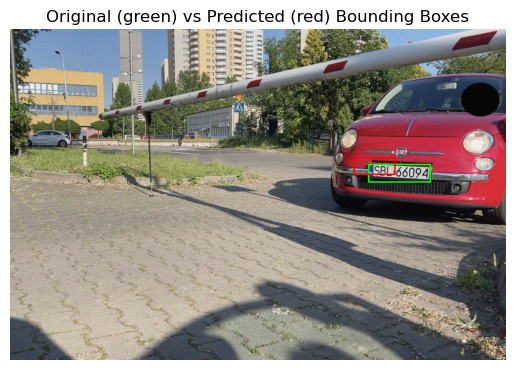

In [13]:
import cv2
import matplotlib.pyplot as plt

# Load the original image
img_path = './data/original/noise_photos/noise_96.jpg'
image = cv2.imread(img_path)

# Convert to RGB for displaying with matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Bounding boxes
predicted = rescaled_predicted[0]
original  = rescaled_original[0]

# Convert to int
predicted = list(map(int, predicted))
original = list(map(int, original))

# Draw original bbox (GREEN)
cv2.rectangle(image_rgb, (original[0], original[1]), (original[2], original[3]), (0, 255, 0), 6)

# Draw predicted bbox (RED)
cv2.rectangle(image_rgb, (predicted[0], predicted[1]), (predicted[2], predicted[3]), (255, 0, 0), 6)

# Show the image
plt.imshow(image_rgb)
plt.title("Original (green) vs Predicted (red) Bounding Boxes")
plt.axis("off")
plt.show()

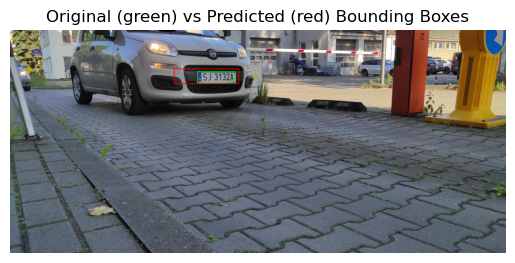

In [14]:
import cv2
import matplotlib.pyplot as plt

# Load the original image
img_path = './data/original/photos/19.jpg'
image = cv2.imread(img_path)

# Convert to RGB for displaying with matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Bounding boxes
predicted = rescaled_predicted[1]
original  = rescaled_original[1]

# Convert to int
predicted = list(map(int, predicted))
original = list(map(int, original))

# Draw original bbox (GREEN)
cv2.rectangle(image_rgb, (original[0], original[1]), (original[2], original[3]), (0, 255, 0), 6)

# Draw predicted bbox (RED)
cv2.rectangle(image_rgb, (predicted[0], predicted[1]), (predicted[2], predicted[3]), (255, 0, 0), 6)

# Show the image
plt.imshow(image_rgb)
plt.title("Original (green) vs Predicted (red) Bounding Boxes")
plt.axis("off")
plt.show()

In [15]:
y_predicted_val = keras_model.predict(X_val)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


In [17]:
rescaled_predicted = dp.rescale_bbox(y_predicted_val, true_size_val)
rescaled_original = dp.rescale_bbox(Y_val, true_size_val)
print(rescaled_predicted[0:2])
print(rescaled_original[0:2])

[[2088.9192485809326, 478.97044837474823, 2400.035581588745, 579.341787815094], [658.9907941818237, 757.8946682810783, 910.1478513479233, 842.215439915657]]
[[2182.9700660705566, 454.21000814437866, 2519.5000076293945, 543.54998087883], [793.5200247764587, 761.0499857664108, 1045.3600132465363, 850.4799649715424]]


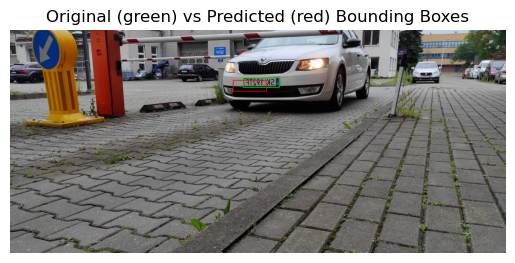

In [18]:
import cv2
import matplotlib.pyplot as plt

# Load the original image
img_path = './data/original/flipped_noise_photos/noise_flip_92.jpg'
image = cv2.imread(img_path)

# Convert to RGB for displaying with matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Bounding boxes
predicted = rescaled_predicted[0]
original  = rescaled_original[0]

# Convert to int
predicted = list(map(int, predicted))
original = list(map(int, original))

# Draw original bbox (GREEN)
cv2.rectangle(image_rgb, (original[0], original[1]), (original[2], original[3]), (0, 255, 0), 6)

# Draw predicted bbox (RED)
cv2.rectangle(image_rgb, (predicted[0], predicted[1]), (predicted[2], predicted[3]), (255, 0, 0), 6)

# Show the image
plt.imshow(image_rgb)
plt.title("Original (green) vs Predicted (red) Bounding Boxes")
plt.axis("off")
plt.show()

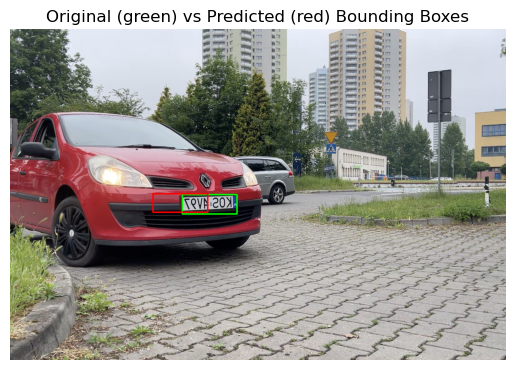

In [19]:
import cv2
import matplotlib.pyplot as plt

# Load the original image
img_path = './data/original/flipped_photos/flip_167.jpg'
image = cv2.imread(img_path)

# Convert to RGB for displaying with matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Bounding boxes
predicted = rescaled_predicted[1]
original  = rescaled_original[1]

# Convert to int
predicted = list(map(int, predicted))
original = list(map(int, original))

# Draw original bbox (GREEN)
cv2.rectangle(image_rgb, (original[0], original[1]), (original[2], original[3]), (0, 255, 0), 6)

# Draw predicted bbox (RED)
cv2.rectangle(image_rgb, (predicted[0], predicted[1]), (predicted[2], predicted[3]), (255, 0, 0), 6)

# Show the image
plt.imshow(image_rgb)
plt.title("Original (green) vs Predicted (red) Bounding Boxes")
plt.axis("off")
plt.show()

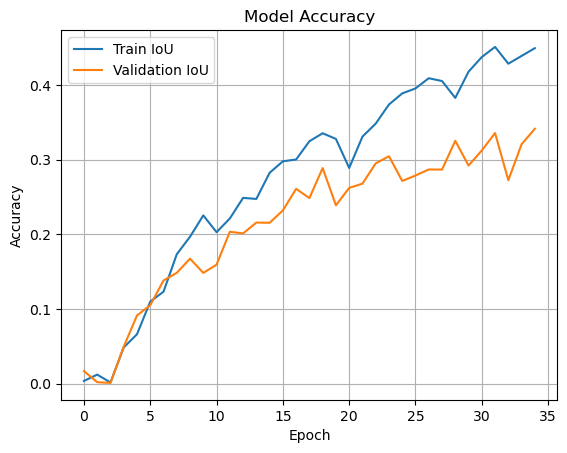

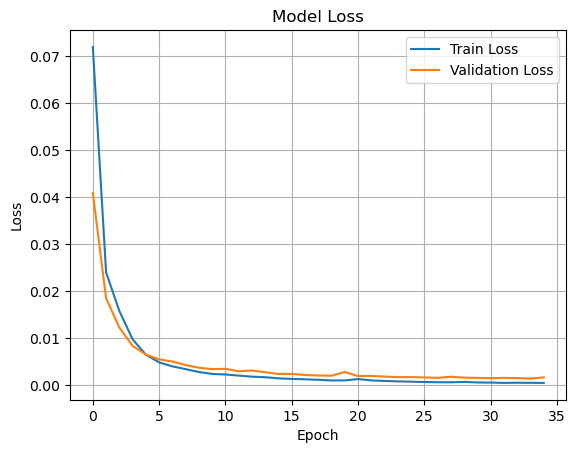

In [20]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['mean_iou'], label='Train IoU')
plt.plot(history.history['val_mean_iou'], label='Validation IoU')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()